<a href="https://colab.research.google.com/github/stacykeago/INDEPENDENT-PROJECT-19-02-2022/blob/main/INDEPENDENT_PROJECT_19_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

# **EXPLORATORY DATA ANALYSIS**

###  Define the question

 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following: 
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### Metric for success

Building of a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### The context


Understanding different factors that contribute to the occurence of hypothroid.

### Experimental design taken 


The Decision Tree and the Support Vector have been used.

### Appropriateness of available data to answer the given question.

The data used for this project is necessary for building a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# **DATA CLEANING**

## Import libraries

In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [121]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [122]:
# we have two datasets fifa and reuslts dataset
# Data http://bit.ly/hypothyroid_data
hypot =pd.read_excel('/content/hypothyroid.xlsx')

## Preview dataset

In [123]:
# preview data set
hypot.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [124]:
hypot.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.8,y,139,y,0.97,y,143,n,?


## Datset shape

In [125]:
# Preview the shape
hypot.shape

(3163, 26)

## Dataset summary info

In [126]:
#Check for dataset info
hypot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## Statistical information

In [127]:
hypot.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


## Check for columns

In [128]:
hypot.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

## Check for duplicates

In [129]:
hypot.duplicated().any()

True

In [130]:
# dropping duplicates
hypot.drop_duplicates(inplace=True)

## Check for null values

In [131]:
hypot.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [132]:
# No null values in the dataset

## Unique values

In [133]:
# check for unique values
hypot.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

Our data has unique values

### Check and align column datatypes

In [134]:
hypot.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [135]:
import itertools
plt.style.use('fivethirtyeight')

In [136]:
# replacing values and variables
hypot = hypot.replace({'f' : 0, 't' : 1})
hypot = hypot.replace({'n' : 0, 'y' : 1})
hypot = hypot.replace({'?': np.nan})
hypot = hypot.replace({'M' : 0, 'F' : 1})
hypot.replace({"?": np.nan, "--": np.nan}, inplace=True)


In [137]:
#Convert to numerical using apply method 
hypot[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]] =hypot[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]].apply(pd.to_numeric) 
print(hypot.dtypes)

status                        object
age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object


In [138]:
def clean_dataset(hypo):
    assert isinstance(hypo, pd.hypo), "df needs to be a pd.DataFrame"
    hypo.dropna(inplace=True)
    indices_to_keep = ~hypo.isin([np.nan, np.inf, -np.inf]).any(1)
    return hypo[indices_to_keep].astype(np.float64)

## Check for anormalies

In [139]:
columns =['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
for i in columns:
  print('unique values' in i, 'are :')
  print(hypot[i].unique())
  print('                                              ')
  print('**********************************************')

False are :
['hypothyroid' 'negative']
                                              
**********************************************
False are :
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]
                                              
**********************************************
False are :
[ 0.  1. nan]
                                              
**********************************************
False are :
[0 1]
                                              
**********************************************
False are :
[0 1]
                                              
**********************************************
False are :
[0 1]
                    

Column 'TBG' has null values

In [208]:
hypo= hypot.drop(columns=['TBG','TBG_measured'])

# **UNIVARIATE ANALYSIS**

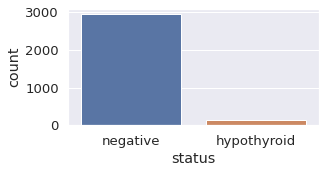

In [168]:
# Categorical data
plt.figure(figsize=(4, 2))
sns.countplot(hypot.status.dropna(), order = hypot.status.value_counts().index);

In [209]:
# LIST THE COLUMNS INTO 2. AND PLOT HISTOGRAMS FOR THE DATA

columns_dict ={'age':1, 'sex':2, 'on_thyroxine':3, 'query_on_thyroxine':4,
       'on_antithyroid_medication':5, 'thyroid_surgery':6, 'query_hypothyroid':7,
       'query_hyperthyroid':8, 'pregnant':9, 'sick':10}

columns_dict2= {'tumor':1, 'lithium':2, 'goitre':3, 'TSH_measured':4,
                'TSH':5, 'T3_measured':6, 'T3':7, 'TT4_measured':8, 'TT4':9,
                'T4U_measured':10, 'T4U':11, 'FTI_measured':12, 'FTI':13}


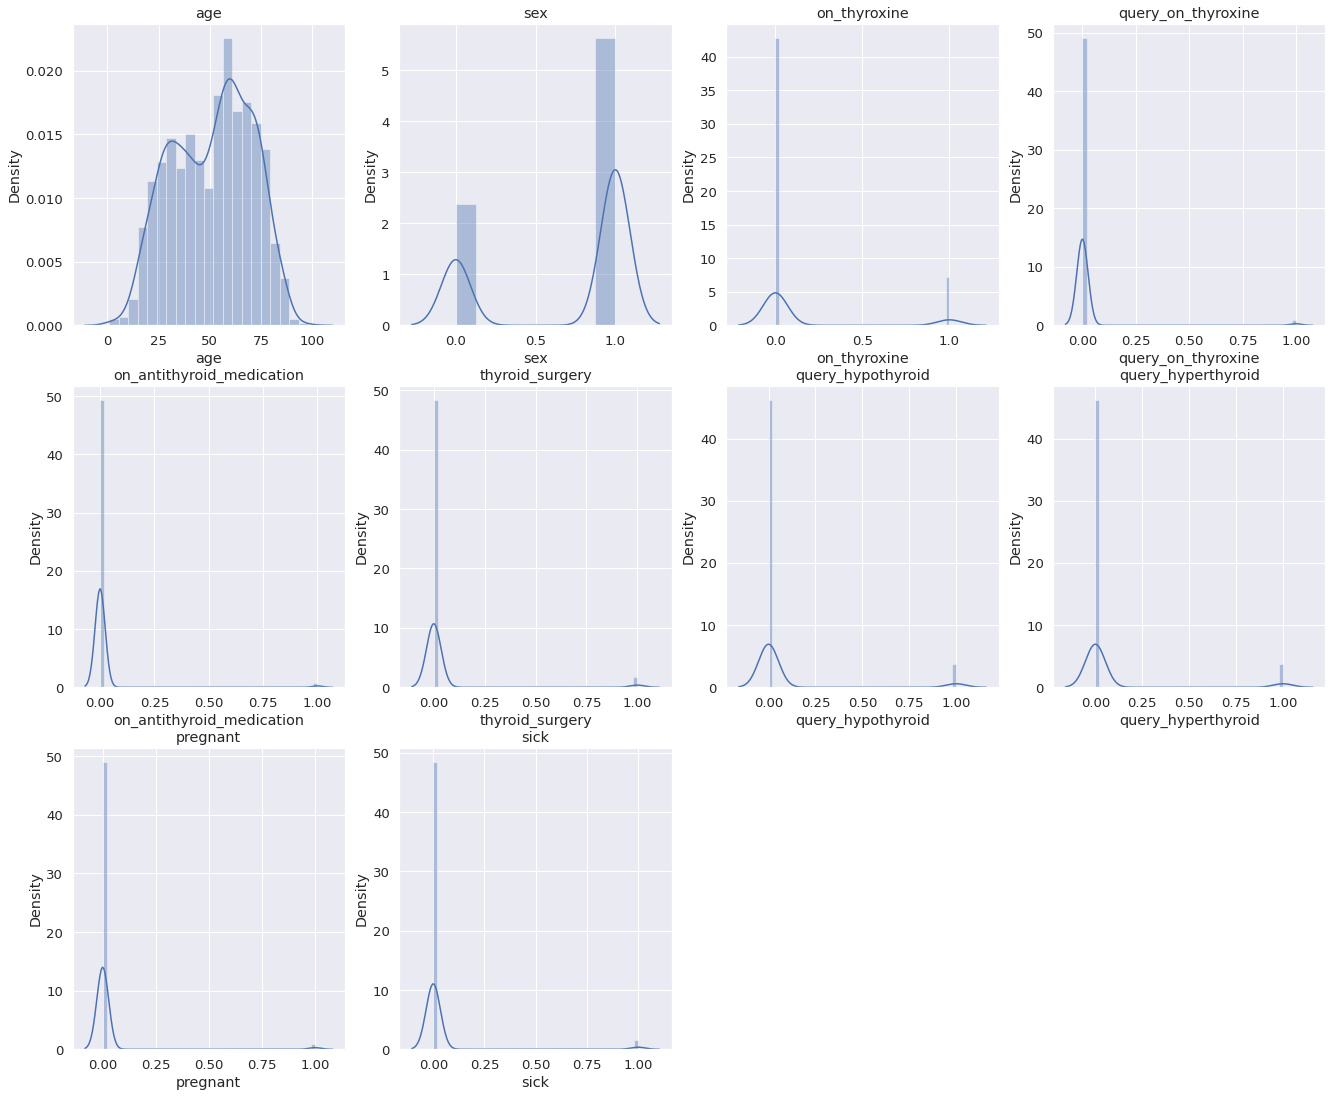

In [210]:
# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(hypot[variable])
  plt.title(variable)

plt.show()

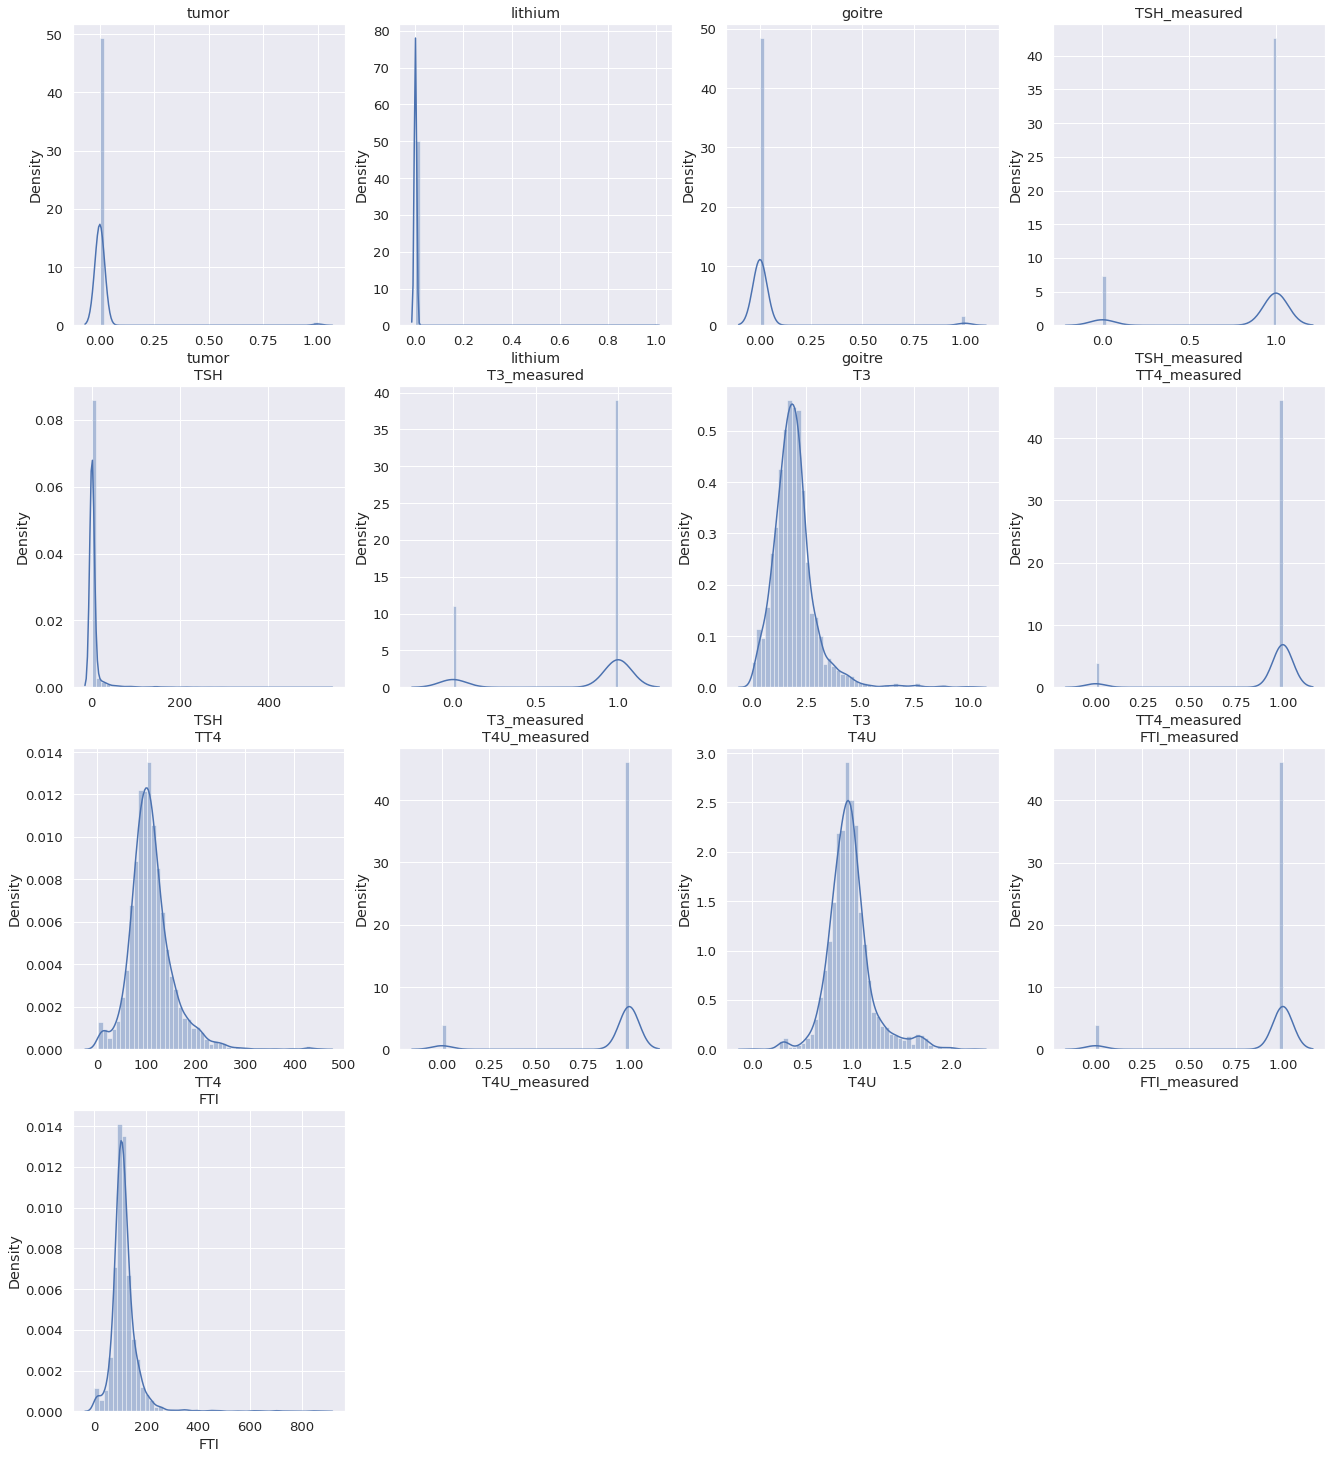

In [211]:
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved
plt.figure(figsize = (20,30))
for variable,i in columns_dict2.items():
  
  plt.subplot(5,4,i)
  sns.distplot(hypot[variable])
  plt.title(variable)

plt.show()

In [216]:
hypot.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

# **BIVARIATE ANALYSIS**

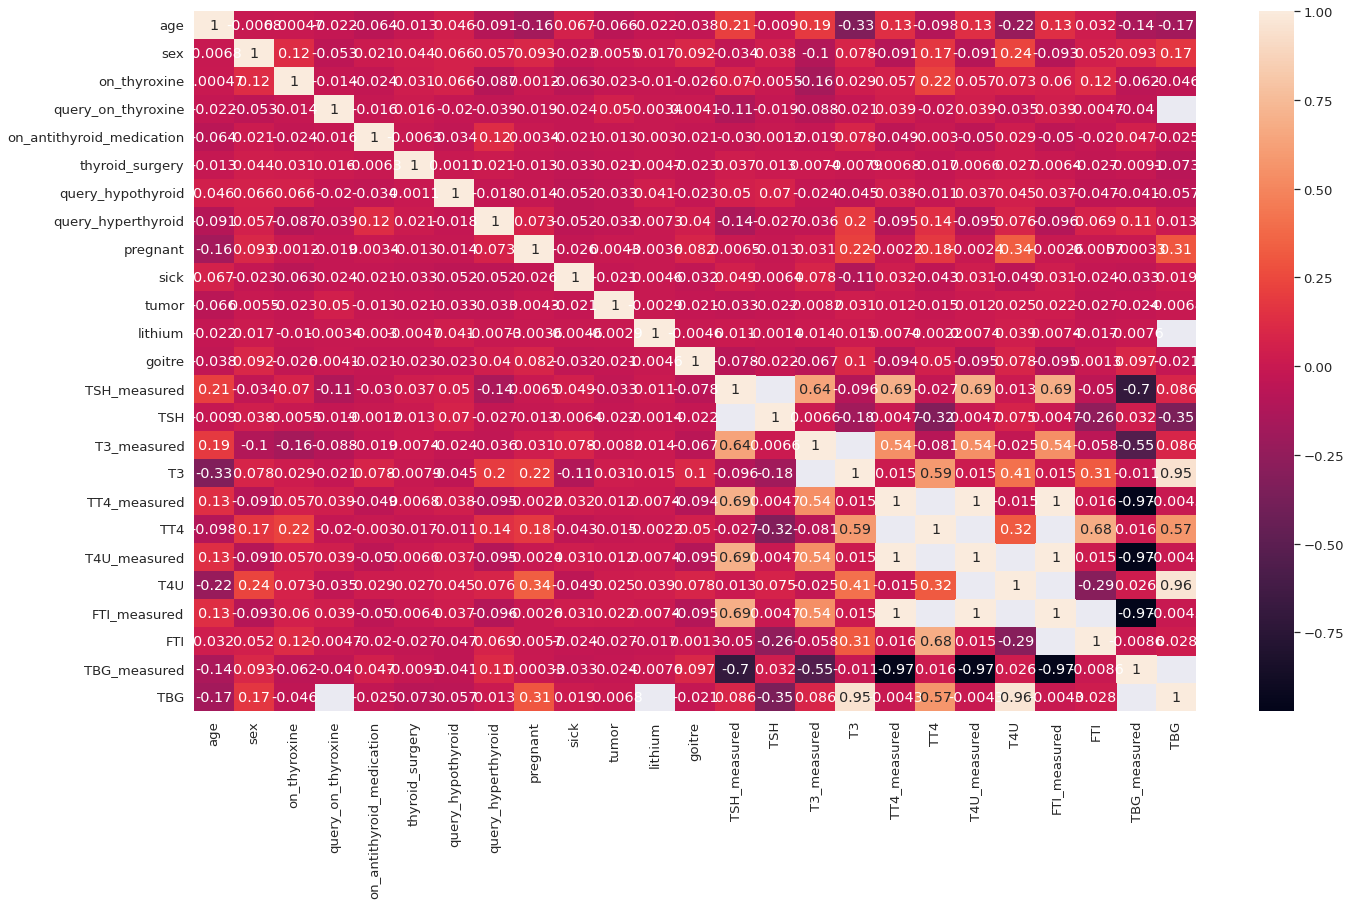

In [222]:
plt.figure(figsize=(20, 12))

vg_corr = hypot.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [145]:
!pip install --user --upgrade scikit-learn

# **SUPPORT VECTOR MACHINE**

### Outliers


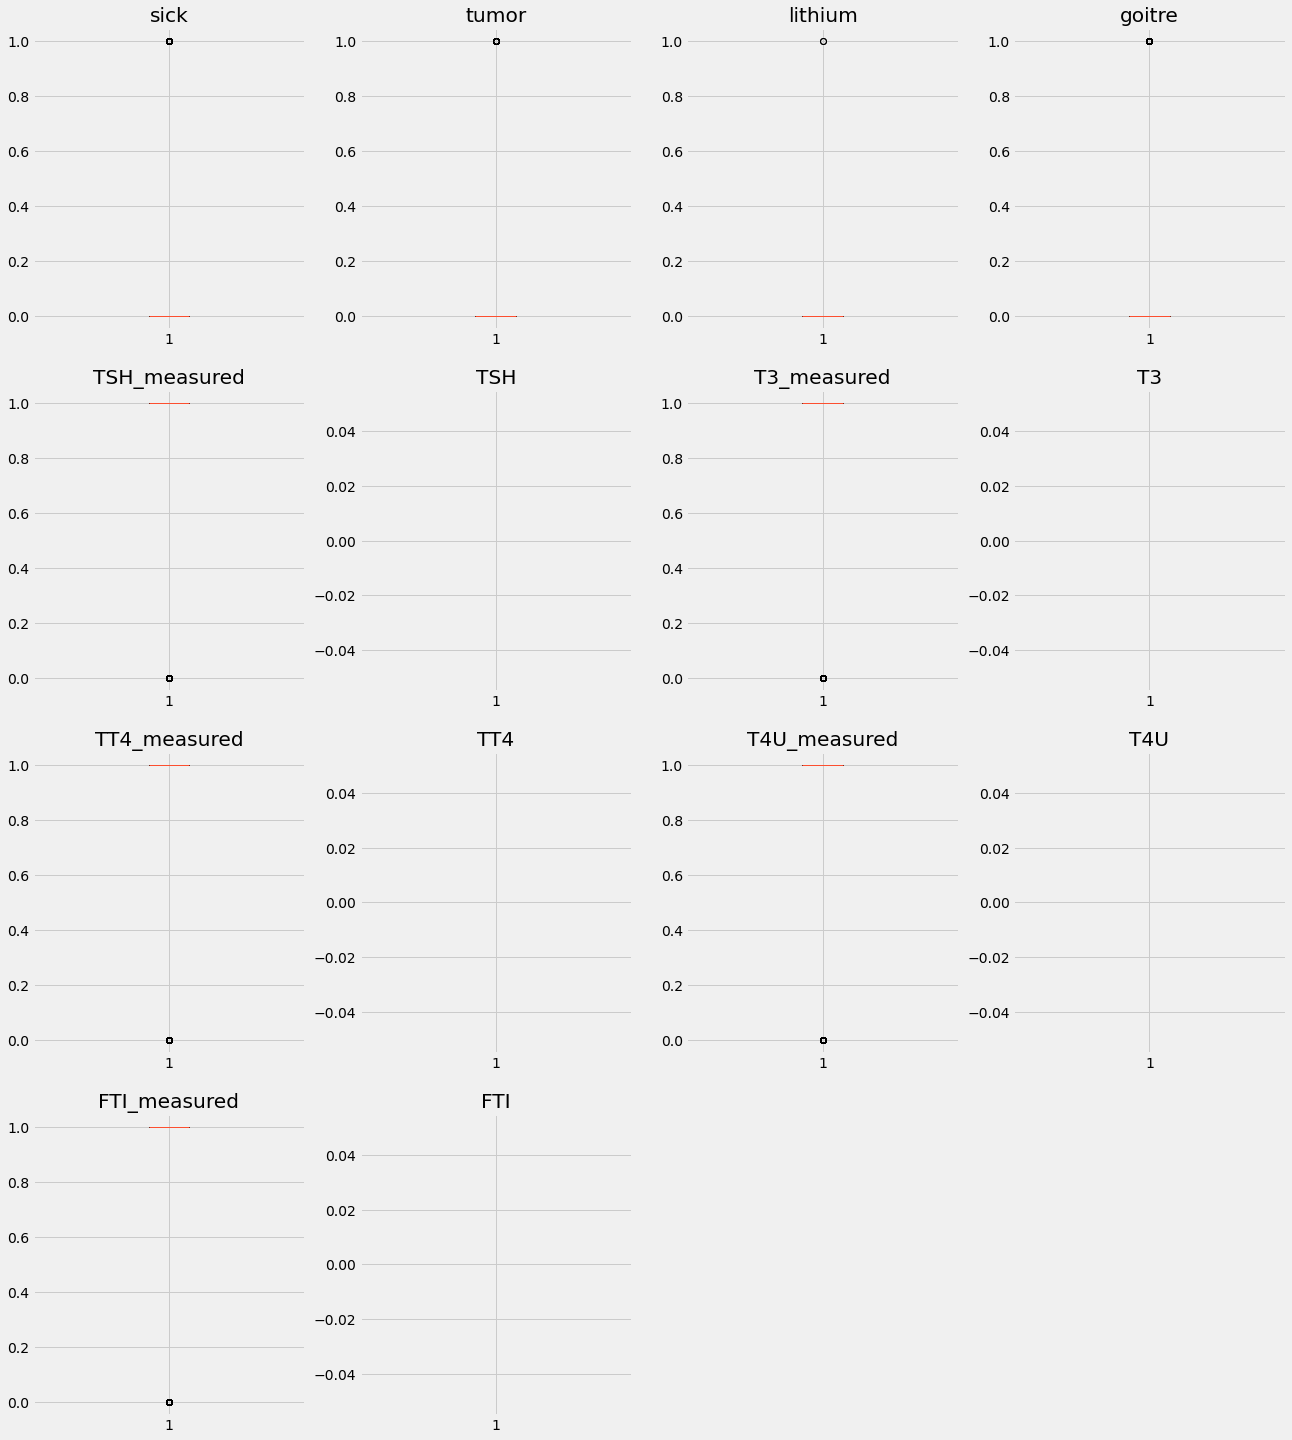

In [146]:
# Check for outliers for the rest of the columns
col_dict2={'sick':1, 'tumor':2, 'lithium':3, 'goitre':4,
       'TSH_measured':5, 'TSH':6, 'T3_measured':7, 'T3':8, 
       'TT4_measured':9, 'TT4':10,'T4U_measured':11, 'T4U':12,
       'FTI_measured':13, 'FTI':14}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in col_dict2.items():
  plt.subplot(5,4,i)
  plt.boxplot(hypo[variable])
  plt.title(variable)

plt.show()

In [147]:
# importing libraries
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

#### Replace null values

Our data has many null values. We replace that with '0'

In [148]:
hypo.isnull().sum()

status                         0
age                          438
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          455
T3_measured                    0
T3                           680
TT4_measured                   0
TT4                          240
T4U_measured                   0
T4U                          239
FTI_measured                   0
FTI                          238
dtype: int64

In [149]:
# filling the null values with zeros
hypo.fillna(0,inplace=True)

### Declare feature vector and target variable

In [150]:
X = hypo.drop(['status'], axis=1)
y = hypo['status']

### Split data into separate training and test set 

In [151]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [152]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((2468, 23), (618, 23))

### Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.

In [153]:
cols = X_train.columns

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [156]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [157]:
X_train.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
count,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03,2.468000e+03
mean,1.844374e-17,2.787254e-16,1.825480e-15,3.691447e-16,8.379530e-17,-8.684301e-17,2.206501e-16,-6.955988e-16,9.304641e-16,1.940416e-16,-2.723038e-16,-9.689429e-17,1.069512e-16,4.371166e-16,7.585549e-17,-3.464724e-16,-1.905553e-16,-1.069737e-16,2.133176e-16,-1.635645e-16,-1.760421e-16,2.713928e-16,-8.052266e-17
std,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00
min,-1.726745e+00,-1.476622e+00,-4.132529e-01,-1.299742e-01,-1.181896e-01,-1.853838e-01,-2.829974e-01,-2.829974e-01,-1.437993e-01,-1.806543e-01,-1.164146e-01,-2.013332e-02,-1.806543e-01,-2.419826e+00,-2.178580e-01,-1.878414e+00,-1.273464e+00,-3.492544e+00,-1.952830e+00,-3.502687e+00,-2.672906e+00,-3.512911e+00,-1.656105e+00
25%,-6.679632e-01,-1.476622e+00,-4.132529e-01,-1.299742e-01,-1.181896e-01,-1.853838e-01,-2.829974e-01,-2.829974e-01,-1.437993e-01,-1.806543e-01,-1.164146e-01,-2.013332e-02,-1.806543e-01,4.132529e-01,-2.178580e-01,5.323639e-01,-8.518291e-01,2.863243e-01,-4.559820e-01,2.854951e-01,-2.498422e-01,2.846642e-01,-3.389613e-01
50%,1.335445e-01,6.772214e-01,-4.132529e-01,-1.299742e-01,-1.181896e-01,-1.853838e-01,-2.829974e-01,-2.829974e-01,-1.437993e-01,-1.806543e-01,-1.164146e-01,-2.013332e-02,-1.806543e-01,4.132529e-01,-2.010815e-01,5.323639e-01,7.576788e-02,2.863243e-01,-8.871478e-03,2.854951e-01,1.047525e-01,2.846642e-01,-2.904522e-02
75%,8.064152e-01,6.772214e-01,-4.132529e-01,-1.299742e-01,-1.181896e-01,-1.853838e-01,-2.829974e-01,-2.829974e-01,-1.437993e-01,-1.806543e-01,-1.164146e-01,-2.013332e-02,-1.806543e-01,4.132529e-01,-1.437798e-01,5.323639e-01,5.817299e-01,2.863243e-01,4.576786e-01,2.854951e-01,4.297976e-01,2.846642e-01,2.963667e-01
max,2.112576e+00,6.772214e-01,2.419826e+00,7.693837e+00,8.460983e+00,5.394216e+00,3.533601e+00,3.533601e+00,6.954135e+00,5.535434e+00,8.589987e+00,4.966890e+01,5.535434e+00,4.132529e-01,2.287711e+01,5.323639e-01,7.327890e+00,2.863243e-01,6.406192e+00,2.854951e-01,3.325654e+00,2.846642e-01,1.154632e+01


## Run SVM with default hyperparameters

The C parameter tells the SVM optimization how 
much you want to avoid misclassifying each training example.
For large values of C, the optimization will choose a smaller-margin 
hyperplane if that hyperplane does a better 
job of getting all the training points classified correctly.

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [158]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC() 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters:{0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters:0.9806


### Run SVM with rbf kernel and C=100.0

Increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [159]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9854


### Run SVM with rbf kernel and C=1000.0

In [160]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9838


## Run SVM with linear kernel 1.0

In [161]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 
# fit classifier to training set
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
y_pred_train = linear_svc.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9850


### Run SVM with linear kernel C=100.0

In [162]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 
# fit classifier to training set
linear_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9887


### Run SVM with linear kernel..C=1000.0

In [163]:
#instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)
# fit classifier to training set
linear_svc1000.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc1000.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9887


## Run SVM with polynomial kernel c=1.0

In [164]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 
# fit classifier to training set
poly_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=poly_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9790


### Run SVM with polynomial kernel and C=100.0

In [165]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 
# fit classifier to training set
poly_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9838


In [166]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 19   6]
 [  2 591]]

True Positives(TP) =  19

True Negatives(TN) =  591

False Positives(FP) =  6

False Negatives(FN) =  2


### Conclusion

1. Model accuracy score with default hyperparameters:0.9716
2. We get maximum accuracy with Polynomial kernel with C=100.0. and the accuracy is 0.9747. 
3. There are outliers in our dataset. So, as I increased the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.
4. A confusion matrix summarizes the performance of a classification algorithm. It will give a clear picture of classification model performance and the types of errors produced by the model.

# DECISION TREE

In feature engineering we transform raw data into useful features that help us to understand our model better and increase its predictive power

### ### Declare Feature Vector and Target variable

In [169]:
#  Declare feature vector and target variable
X = hypo.drop(['status'], axis=1)
y = hypo['status']

### Split the data into subsets


In [170]:
# Split data into separate training and test set
# # split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [171]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((2067, 23), (1019, 23))

## **1.Decision Tree Classifier with criterion gini index**

In [172]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [173]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [174]:
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [175]:
y_pred_gini = clf_gini.predict(X_test)

#### Check accuracy score with criterion gini index

In [176]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9902


#### Compare the train-set and test-set accuracy

In [177]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [178]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9947


### Check for overfitting and underfitting

In [179]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9947
Test set score: 0.9902


Here, the training-set accuracy score is 0.9939 while the test-set accuracy to be 0.9904. These two values are quite comparable. So, there is no sign of overfitting.

### Modeling and visualizing the decision trees created.

[Text(0.5, 0.875, 'X[14] <= 14.95\ngini = 0.092\nsamples = 2067\nvalue = [100, 1967]'),
 Text(0.25, 0.625, 'X[14] <= 6.35\ngini = 0.016\nsamples = 1933\nvalue = [16, 1917]'),
 Text(0.125, 0.375, 'X[16] <= 6.65\ngini = 0.004\nsamples = 1836\nvalue = [4, 1832]'),
 Text(0.0625, 0.125, 'gini = 0.003\nsamples = 1828\nvalue = [3, 1825]'),
 Text(0.1875, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.375, 0.375, 'X[22] <= 65.0\ngini = 0.217\nsamples = 97\nvalue = [12, 85]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 85\nvalue = [0, 85]'),
 Text(0.75, 0.625, 'X[22] <= 64.5\ngini = 0.468\nsamples = 134\nvalue = [84, 50]'),
 Text(0.625, 0.375, 'X[4] <= 0.5\ngini = 0.128\nsamples = 87\nvalue = [81, 6]'),
 Text(0.5625, 0.125, 'gini = 0.09\nsamples = 85\nvalue = [81, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'X[14] <= 17.2\ngini = 0.12\nsamples = 47\nvalue = [3, 44]'),


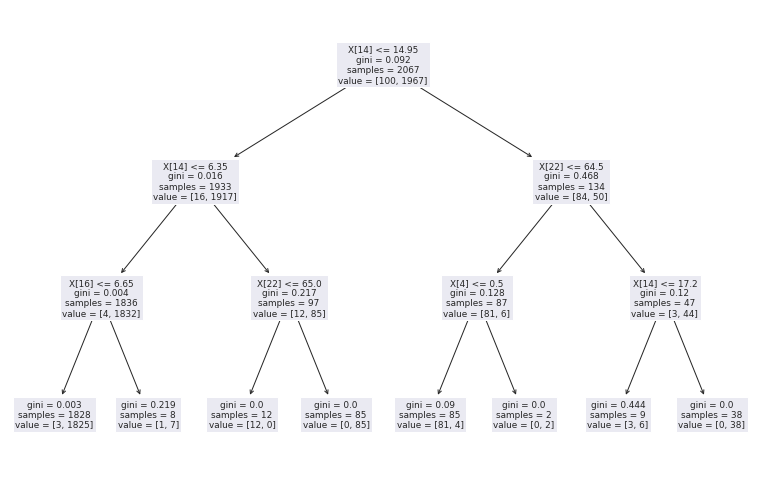

In [180]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

### Visualize decision-trees with graphviz

# **2. Decision Tree Classifier with criterion entropy**

In [189]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [191]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [192]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9902


## Compare the train-set and test-set accuracy

In [193]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [194]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9947


### Check for overfitting and underfitting

In [195]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9947
Test set score: 0.9902


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.9929 while the test-set accuracy to be   0.9923. These two values are quite comparable. So, there is no sign of overfitting.

### Visualize decision-tree

[Text(0.5, 0.875, 'X[14] <= 14.95\nentropy = 0.279\nsamples = 2067\nvalue = [100, 1967]'),
 Text(0.25, 0.625, 'X[22] <= 64.5\nentropy = 0.069\nsamples = 1933\nvalue = [16, 1917]'),
 Text(0.125, 0.375, 'X[14] <= 5.95\nentropy = 0.358\nsamples = 221\nvalue = [15, 206]'),
 Text(0.0625, 0.125, 'entropy = 0.108\nsamples = 209\nvalue = [3, 206]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.375, 0.375, 'X[16] <= 6.65\nentropy = 0.007\nsamples = 1712\nvalue = [1, 1711]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 1704\nvalue = [0, 1704]'),
 Text(0.4375, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.75, 0.625, 'X[22] <= 64.5\nentropy = 0.953\nsamples = 134\nvalue = [84, 50]'),
 Text(0.625, 0.375, 'X[4] <= 0.5\nentropy = 0.362\nsamples = 87\nvalue = [81, 6]'),
 Text(0.5625, 0.125, 'entropy = 0.274\nsamples = 85\nvalue = [81, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'X[14] <= 17.2\nentro

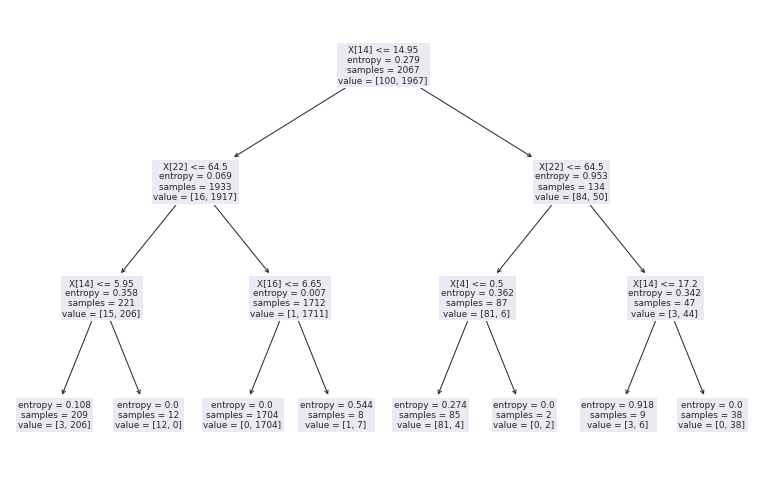

In [196]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Visualize decision-trees with graphviz

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

### Interpret the feature selection and models created.